# Life Expectancy Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,accuracy_score

### Import The DataSet

In [3]:
df = pd.read_csv("Life_expectancy.csv")

In [4]:
df.shape

(2938, 22)

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [7]:
df.head(n=20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [8]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


### EDA 

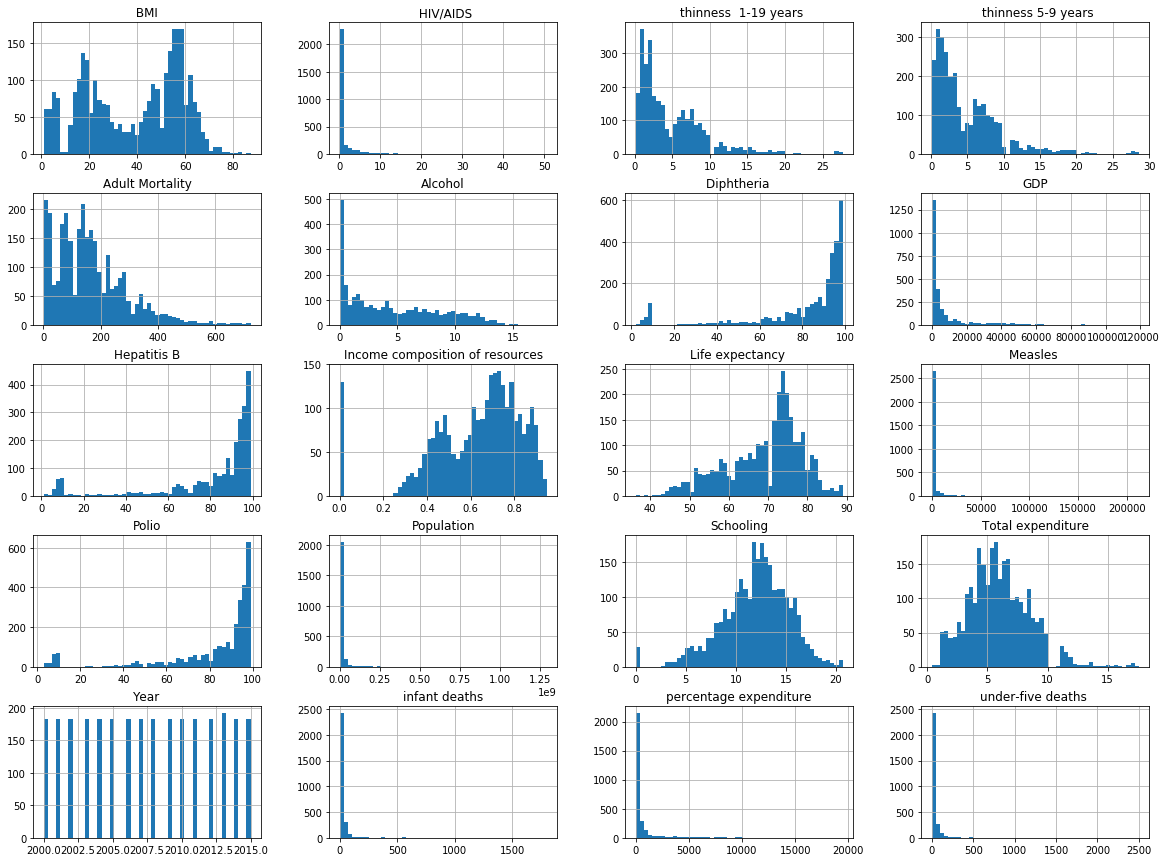

In [11]:
df.hist(bins=50, figsize=([20,15]))
plt.show()

In [12]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


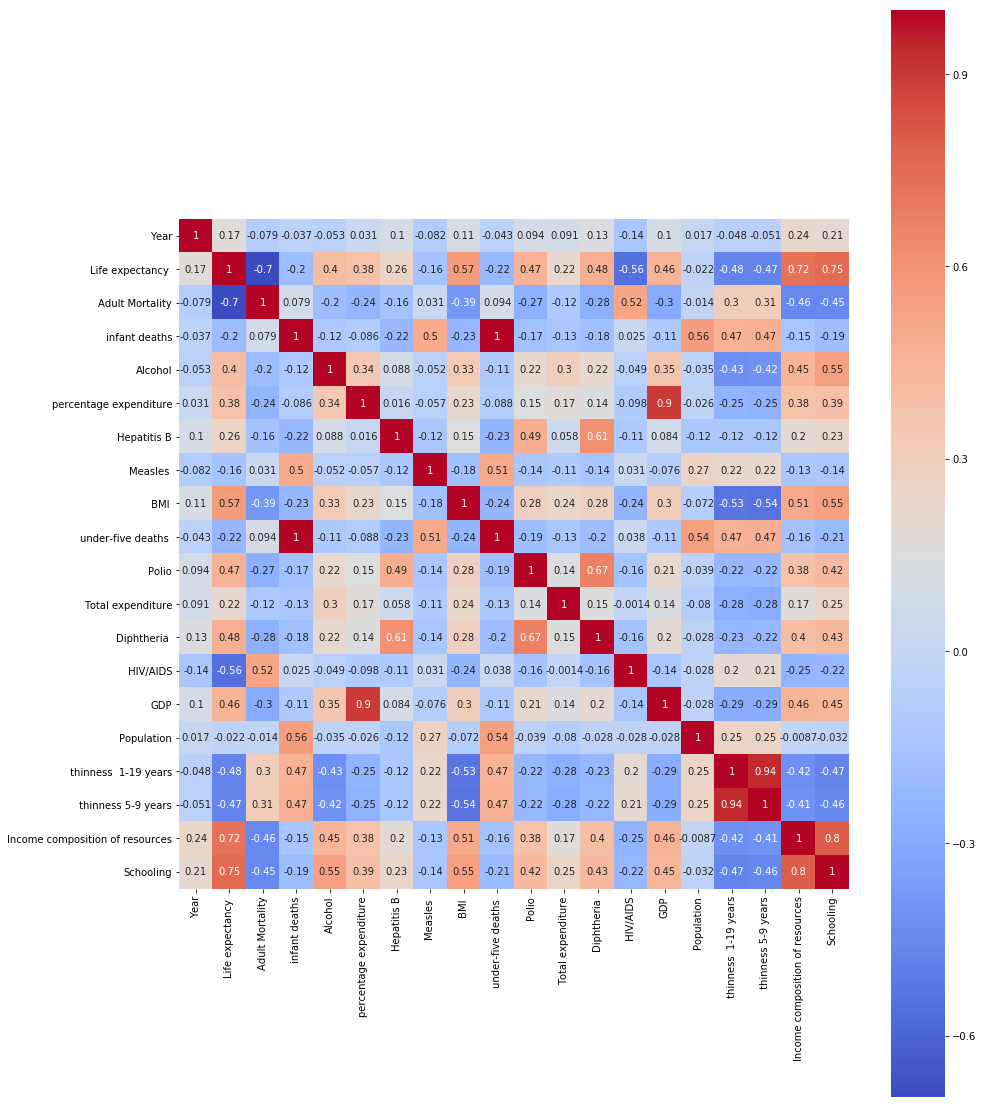

In [13]:
plt.figure(figsize=(15,20)),
sns.heatmap(df.corr(), square =True,annot =True,cmap='coolwarm')

Correlation between each variables can be used to check the how variables are related to each other

Some insights about correlation

The value of correlation is between -1,1 inclusive
Correlation is Positive when the values increase together, and
Correlation is Negative when one value decreases as the other increases.
Correlation is 0 when values are not dependent on each ther
If correlation is >=0.7 or <=-0.7, then the values are said to be highly correlated to each other.M

Life Expectancy (target variable) appears to be relatively highly correlated with HIV/AIDS (negative)
Life Expectancy (target variable) appears to be relatively highly correlated with Income Composition of Resources (positive)
Life expectancy (target variable) is extremely lowly correlated to population (nearly no correlation at all). Hence
The categorical columns, 'year' and 'country' will be dropped as they don't have significant differences among life expectancy.

In [14]:
new_cols=[]
for col in df.columns:
  new_cols.append(col.strip().replace('  ',' ').replace(' ','_').lower())
df.columns=new_cols


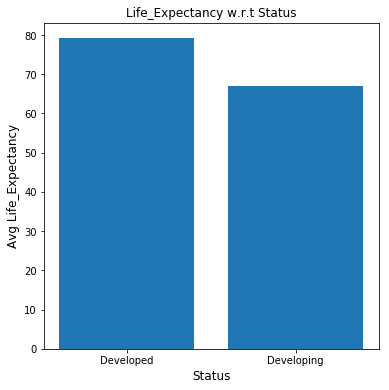

In [15]:
plt.figure(figsize=(6,6))
plt.bar(df.groupby('status')['status'].count().index,df.groupby('status')['life_expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

In [16]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [17]:
df.drop(columns=['country','year','population'], inplace=True)

In [18]:
df.columns

Index(['status', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness_1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [19]:
df.head()

,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


In [20]:
df.isnull().sum()

status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [21]:
df['life_expectancy'].fillna((df['life_expectancy'].mean()), inplace=True)
df['adult_mortality'].fillna((df['adult_mortality'].mean()), inplace=True)
df['measles'].fillna((df['measles'].mean()), inplace=True)
df['hepatitis_b'].fillna((df['hepatitis_b'].mean()), inplace=True)
df['percentage_expenditure'].fillna((df['percentage_expenditure'].mean()), inplace=True)
df['alcohol'].fillna((df['alcohol'].mean()), inplace=True)
df['bmi'].fillna((df['bmi'].mean()), inplace=True)
df['polio'].fillna((df['polio'].mean()), inplace=True)
df['total_expenditure'].fillna((df['total_expenditure'].mean()), inplace=True)
df['diphtheria'].fillna((df['diphtheria'].mean()), inplace=True)
df['gdp'].fillna((df['gdp'].mean()), inplace=True)
df['thinness_1-19_years'].fillna((df['thinness_1-19_years'].mean()), inplace=True)
df['thinness_5-9_years'].fillna((df['thinness_5-9_years'].mean()), inplace=True)
df['schooling'].fillna((df['schooling'].mean()), inplace=True)
df['income_composition_of_resources'].fillna((df['income_composition_of_resources'].mean()), inplace=True)

In [22]:
df.isnull().sum()

status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [23]:
df.head()

,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


### Categorical To Numerical

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])


In [26]:
df.head()

,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


### Splitting Data into Features and Label 

In [27]:
df_Y = df["life_expectancy"]

In [28]:
df_Y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: life_expectancy, dtype: float64

In [29]:
df_X = df.drop(["life_expectancy"],axis=1)

In [30]:
df_X.columns

Index(['status', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness_1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(df_X,df_Y,test_size=.2,random_state=40)

In [33]:
print(X_train.shape)
print(X_test.shape)

(2350, 18)
(588, 18)


In [34]:
print(Y_train.shape)
print(Y_test.shape)

(2350,)
(588,)


#### Prediction using :
    1. Linear Regression
    2. Decision Tree Regression
    3. Random Forest Regression



## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression


In [36]:
lr = LinearRegression()

In [37]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
Y_pred = lr.predict(X_test)

In [39]:
lr.score(X_test,Y_test)

0.8271230277029984

In [40]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [41]:
print('MAE:', mean_absolute_error(Y_test, Y_pred))
print('MSE:', mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred)))

MAE: 2.877399009194998
MSE: 14.522628076560538
RMSE: 3.8108566066647716


In [42]:
print("r2_score:",r2_score(Y_test,Y_pred))
print(lr.intercept_)
print(lr.coef_)

r2_score: 0.8271230277029984
56.6933945265191
[-1.65444930e+00 -1.98239796e-02  1.01225858e-01  7.36894369e-02
  7.21737961e-05 -1.29954189e-02 -1.75199535e-05  4.12415692e-02
 -7.56163499e-02  2.81260530e-02  5.19014910e-02  3.94084370e-02
 -4.61582834e-01  3.39937333e-05 -1.17281156e-01  2.01445951e-02
  5.48392906e+00  6.73311237e-01]


In [43]:
coeff_df = pd.DataFrame(lr.coef_,df_X.columns,columns=['coefficient'])
coeff_df

,coefficient
status,-1.654449
adult_mortality,-0.019824
infant_deaths,0.101226
alcohol,0.073689
percentage_expenditure,0.000072
hepatitis_b,-0.012995
measles,-0.000018
bmi,0.041242
under-five_deaths,-0.075616
polio,0.028126


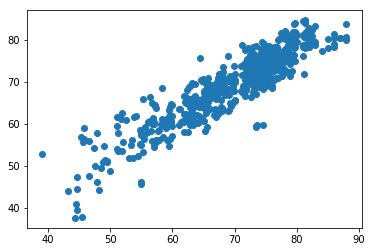

In [44]:
plt.scatter(Y_test,Y_pred)

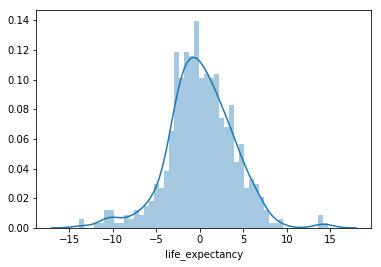

In [45]:
sns.distplot((Y_test-Y_pred),bins=50)

## Decision Tree Regression


  
 

In [46]:
from sklearn.tree import DecisionTreeRegressor  

### Prediction

In [47]:
#create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
#fit the regressor with X and Y data 
regressor.fit(X_train,Y_train)

y_pred =  regressor.predict(X_test)

In [48]:
print('MAE:', mean_absolute_error(Y_test, y_pred))
print('MSE:', mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred)))

MAE: 1.3271684835136242
MSE: 5.136399401997708
RMSE: 2.266362592789977


In [49]:
print("r2_score:",r2_score(Y_test,y_pred))

r2_score: 0.9388564402775923


### Visualization

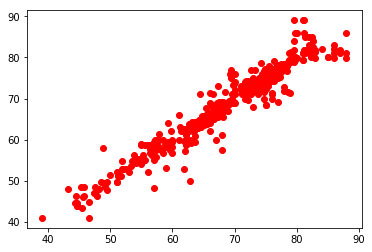

In [50]:
plt.scatter(Y_test,y_pred,color='red')

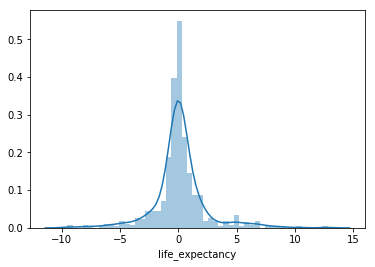

In [51]:
sns.distplot((Y_test-y_pred))

## Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train,Y_train)
cv_score= np.sqrt(-cross_val_score(rf,X_train,Y_train, cv=10, scoring='neg_mean_squared_error'))
rmse = np.mean(cv_score)
print(rmse)

1.9122406432606263


In [53]:
from sklearn import metrics
prediction = rf.predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test, prediction))

1.6921702497875375

In [54]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 1.0545299268614559
MSE: 2.863440154266017
RMSE: 1.6921702497875375


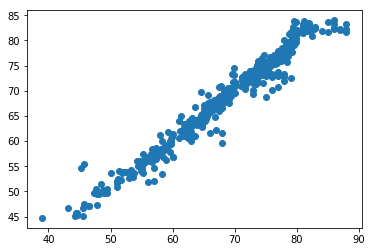

In [55]:
plt.scatter(Y_test,prediction)

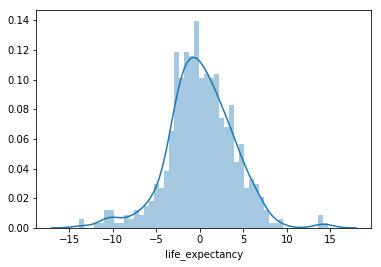

In [56]:
sns.distplot((Y_test-Y_pred),bins=50)

Three models were tested : 
1. Linear Regression
2. Decision tree Regression
3. Random Forest Regression


Of the three models Random Forest gave the least error and was found to be the most suitable one for giving a life expectancy prediction with an error rate as low as 1.69 %.